<a href="https://colab.research.google.com/github/Miguelm-del/analysis-data-py/blob/main/SIGE_Relatorios_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatorios COVID-19 estado de Alagoas

por João Vitor e Miguel Márcio

### relatorios referente ao tema:

- Dispersão dos sintomas por casos - meu
- Analise dos casos por cidade
- Distribuição por faixa etária:
- Evolução temporal: Mostrar a evolução dos casos ao longo do tempo.
- Casos por profissionais de saúde

Raça e cor etc.. x 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [36]:
dados = pd.read_csv('./data/part-00000-af9dbba4-9718-4b2b-bbfe-ef4024e867b5.c000(1).csv', delimiter=";", quotechar='"', low_memory=False)
dados2 = pd.read_csv('./data/part-00000-af9dbba4-9718-4b2b-bbfe-ef4024e867b5.c000.csv', delimiter=";", quotechar='"', low_memory=False) 
dfCovid = pd.concat([dados, dados2])

df = pd.DataFrame(dfCovid)
display(df)



,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,"Dispneia, Tosse",Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2022-08-23,NaN,NaN,NaN,NaN
1,"Tosse, Febre, Dor de Garganta, Coriza",Não,Branca,NaN,NaN,Não,NaN,NaN,Feminino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2021-09-20,NaN,NaN,NaN,41.0
2,"Tosse, Febre, Dor de Garganta, Outros",Não,Branca,"MIALGIA, CONGESTÃO NASAL",NaN,Não,5171 - Bombeiros,NaN,Masculino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2021-08-13,NaN,NaN,NaN,32.0
3,"Dor de Garganta, Febre",Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2022-01-13,NaN,NaN,NaN,41.0
4,"Coriza, Febre",Não,Parda,NaN,NaN,Não,NaN,NaN,Feminino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320612,"Dor de Cabeça, Dor de Garganta",Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2022-03-08,NaN,NaN,NaN,43.0
320613,Tosse,Não,Preta,NaN,NaN,Não,NaN,NaN,Masculino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2022-06-23,NaN,NaN,NaN,NaN
320614,"Coriza, Dor de Cabeça, Febre, Dor de Garganta",Não,Amarela,NaN,NaN,Não,NaN,NaN,Feminino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2022-06-07,NaN,NaN,NaN,47.0
320615,"Coriza, Tosse, Dor de Garganta, Outros",Não,Parda,FRAQUEZA,NaN,Não,NaN,NaN,Masculino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2022-01-25,2022-01-25,NaN,NaN,46.0


# Distribuição por faixa etária

idade
33.0    7268
23.0    7099
43.0    6044
3.0     3889
13.0    2126
53.0     102
63.0      34
73.0      14
83.0       7
Name: count, dtype: int64


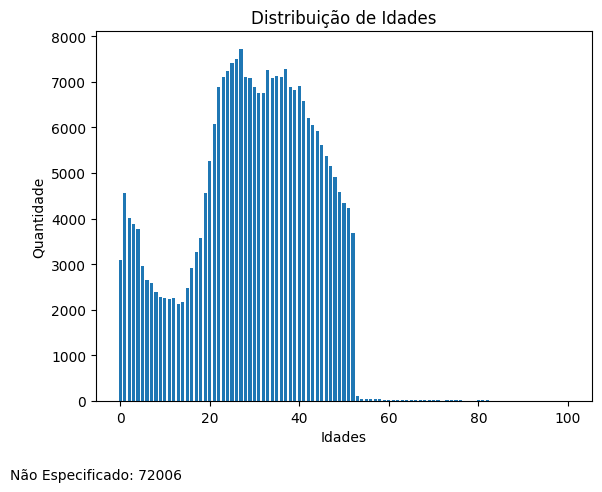

In [96]:
# Fazendo a contagem da quantidade de vezes que cada idade se repete
contagem = df['idade'].value_counts()

# Somando quantas vezes os valores NaN apareceu para saber quantas pessoas não foi identificada a idade
nulos = df['idade'].isna().sum()
print(contagem.filter(like="3.0"))

# Criando uma lista com as idades distintas
idades_distintas = contagem.index.tolist()

# Criando uma lista com as repetições de idade
repeticoes = contagem.values.tolist()

# Adicionando uma nota sobre valores nulos
obs = "Nulos: " + str(nulos)

# Definindo o tipo de gráfico que será criado e também definimos os valores de x, y e a largura das barras
plt.bar(idades_distintas, repeticoes, 0.7)

plt.title('Distribuição de Idades') # Título do gráfico
plt.xlabel('Idades',) # Título do eixo x
plt.ylabel('Quantidade') # Título do eixo y
plt.annotate(obs, (0, -0.2), xycoords='axes fraction', ha='center', va='center') # Configurações da anotação

plt.show() # Exibição do gráfico

# Relátorio dos casos e sintomas

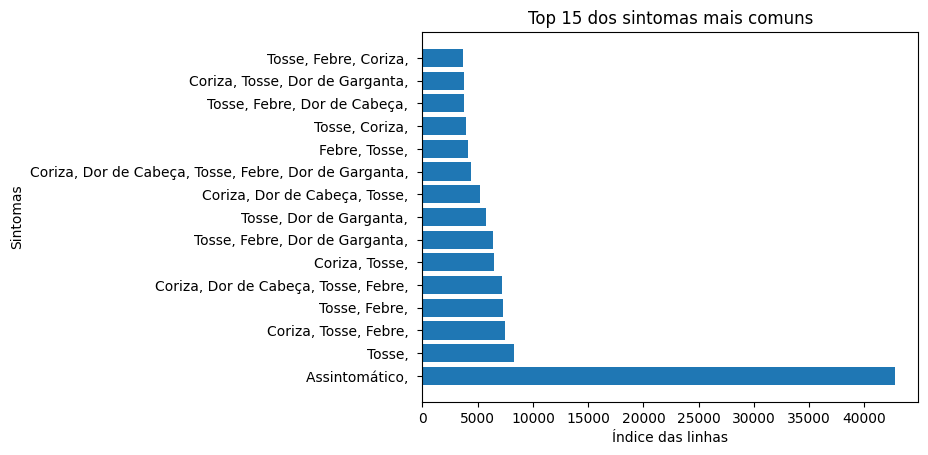

In [45]:
# Concatenar as colunas 'sintomas' e 'outrosSintomas' em uma nova coluna
df['sintomas_combinados'] = df['sintomas'].str.cat(df['outrosSintomas'], sep=', ', na_rep='')

# Contar a ocorrência de cada valor único na coluna 'sintomas_combinados' do DataFrame df.
all_symptom = df['sintomas_combinados'].value_counts()

N = 15 # Top n de sintomas

top_n = all_symptom.head(N) #  Selecionar os N primeiros valores mais frequentes da série all_symptom e armazena-os na variável top_n.

plt.barh(top_n.index, top_n.values) # Gráfico de barras

plt.xlabel("Índice das linhas") # Título do eixo x
plt.ylabel("Sintomas") # Título do eixo y
plt.title(f"Ranking dos {N} sintomas mais comuns") # Título do gráfico

plt.show() # Exibir gráfico de barra